In [822]:
# Import modules for NumPy, Pandas, Matplotlib and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from scipy import stats, integrate

In [755]:
# Read data from the file into pandas dataframe
file_name = '/Users/shilpamadini/Desktop/titanic/titanic_data.csv'
titanic_df = pd.read_csv(file_name)

In [756]:
# determine if there are any NaN in the data frame
titanic_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [757]:
# Number of NaN in each column
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [758]:
# Display top 3 rows from titanic data frame
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [759]:
print titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [760]:
def update_survived(val):
    if val == 0:
        return 'NO'
    else:
        return 'YES'

In [761]:
# Updating Survived column with sring data

titanic_df['Survived'] = titanic_df['Survived'].apply(update_survived)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,NO,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,YES,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,YES,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,YES,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,NO,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [762]:
def update_embarked(val):
    if val == 'C':
        return 'Cherburg'
    elif val == 'Q':
        return 'Queenstown'
    elif val == 'S':
        return 'Southampton'

In [763]:
# Updating Embarked column with city names 

titanic_df['Embarked'] = titanic_df['Embarked'].apply(update_embarked)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,NO,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,YES,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherburg
2,3,YES,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,YES,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,NO,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton


In [764]:
titanic_count_survived = titanic_df.groupby('Survived',as_index=False)

In [765]:
# count of PassengerId based grouped by Survided
titanic_count_survived = titanic_count_survived['PassengerId'].count()


In [766]:
titanic_count_survived

,Survived,PassengerId
0,NO,549
1,YES,342


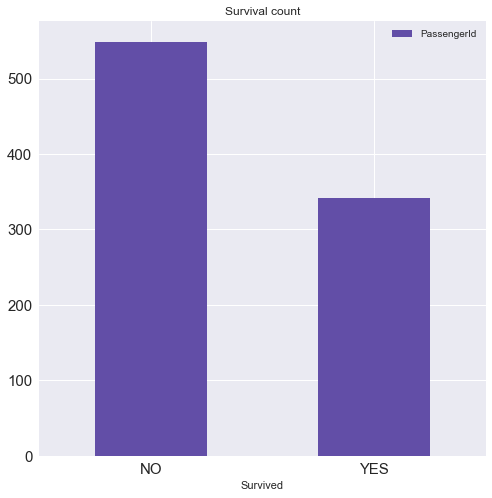

In [767]:
titanic_count_survived.plot(x = 'Survived',y ='PassengerId',kind= 'bar',title='Survival count',rot = 0,color = '#624ea7',figsize=(8,8),fontsize=15)
plt.show()

In [768]:
titanic_count_survived_pclass = titanic_df.groupby(['Survived','Pclass'])['PassengerId'].count().unstack()

In [769]:
titanic_count_survived_pclass

Pclass,1,2,3
Survived,,,
NO,80,97,372
YES,136,87,119


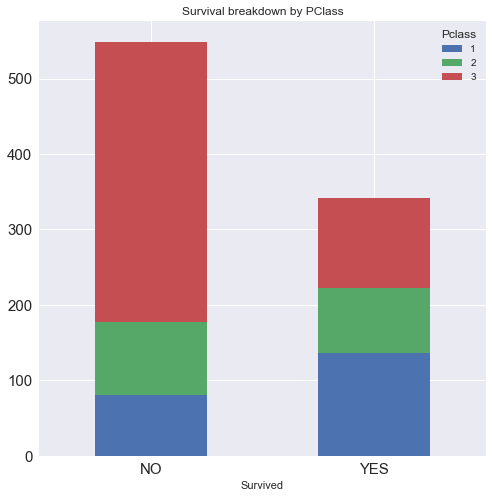

In [770]:
titanic_count_survived_pclass.plot(kind='bar',stacked=True,title='Survival breakdown by PClass',rot = 0,figsize=(8,8),fontsize=15)
plt.show()

In [771]:
titanic_count_survived_pclass

Pclass,1,2,3
Survived,,,
NO,80,97,372
YES,136,87,119


In [774]:
titanic_count_survived_pclass_sex = titanic_df.groupby(['Survived','Pclass','Sex'])['PassengerId'].count().unstack()

In [775]:
titanic_count_survived_pclass_sex

Sex              female  male
Survived Pclass              
NO       1            3    77
         2            6    91
         3           72   300
YES      1           91    45
         2           70    17
         3           72    47

In [776]:
titanic_count_survived_pclass_female = titanic_count_survived_pclass_sex['female'].unstack()
titanic_count_survived_pclass_female

Pclass,1,2,3
Survived,,,
NO,3,6,72
YES,91,70,72


In [777]:
titanic_count_survived_pclass_male = titanic_count_survived_pclass_sex['male'].unstack()
titanic_count_survived_pclass_male

Pclass,1,2,3
Survived,,,
NO,77,91,300
YES,45,17,47


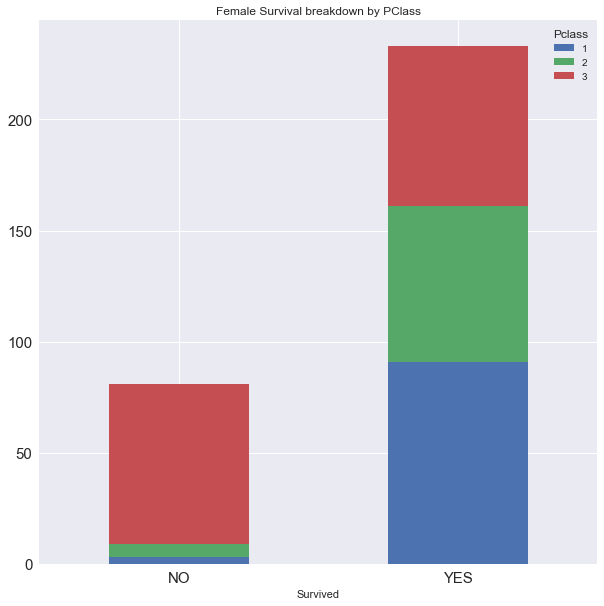

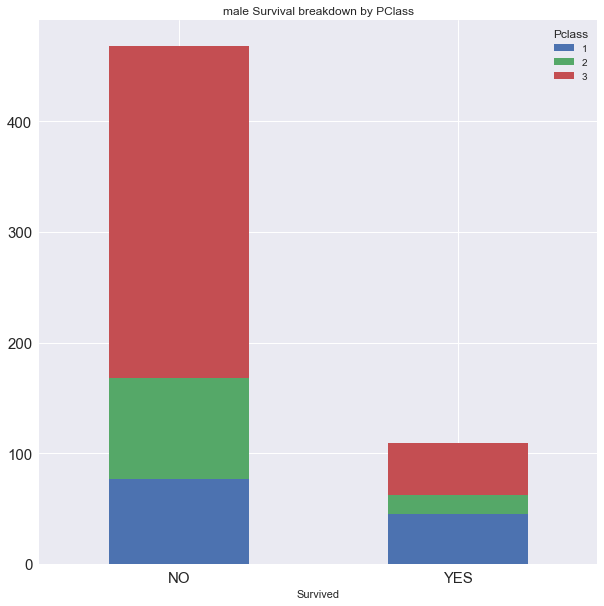

In [707]:

titanic_count_survived_pclass_female.plot(kind='bar',stacked=True,title='Female Survival breakdown by PClass',rot = 0,figsize=(10,10),fontsize=15)
plt.show()
titanic_count_survived_pclass_male.plot(kind='bar',stacked=True,title='male Survival breakdown by PClass',rot = 0,figsize=(10,10),fontsize=15)
plt.show()

In [778]:
titanic_count_survived_pclass_sex

Sex              female  male
Survived Pclass              
NO       1            3    77
         2            6    91
         3           72   300
YES      1           91    45
         2           70    17
         3           72    47

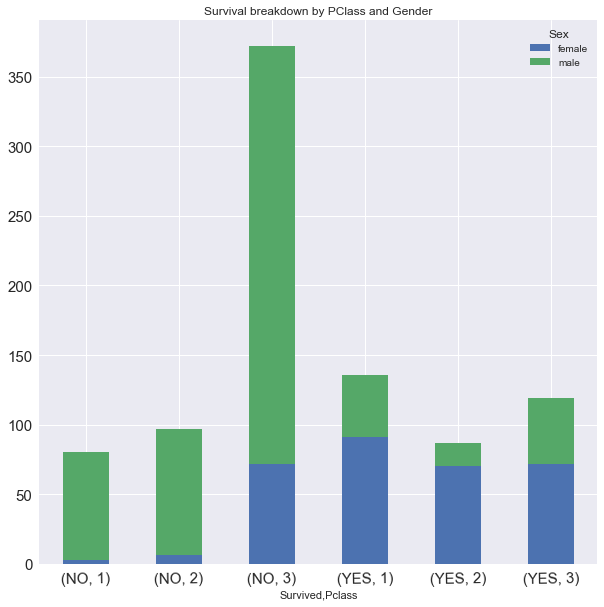

In [779]:
titanic_count_survived_pclass_sex.plot(kind='bar',stacked=True,title='Survival breakdown by PClass and Gender',rot = 1,figsize=(10,10),fontsize=15)
plt.show()

In [780]:
titanic_count_survived_pclass_sex_embarked = titanic_df.groupby(['Survived','Pclass','Sex','Embarked'])['PassengerId'].count().unstack()

In [781]:
titanic_count_survived_pclass_sex_embarked

Embarked                Cherburg  Queenstown  Southampton
Survived Pclass Sex                                      
NO       1      female       1.0         NaN          2.0
                male        25.0         1.0         51.0
         2      female       NaN         NaN          6.0
                male         8.0         1.0         82.0
         3      female       8.0         9.0         55.0
                male        33.0        36.0        231.0
YES      1      female      42.0         1.0         46.0
                male        17.0         NaN         28.0
         2      female       7.0         2.0         61.0
                male         2.0         NaN         15.0
         3      female      15.0        24.0         33.0
                male        10.0         3.0         34.0

In [782]:
titanic_count_survived_pclass_sex_embarked = titanic_count_survived_pclass_sex_embarked.fillna(0)
titanic_count_survived_pclass_sex_embarked

Embarked                Cherburg  Queenstown  Southampton
Survived Pclass Sex                                      
NO       1      female       1.0         0.0          2.0
                male        25.0         1.0         51.0
         2      female       0.0         0.0          6.0
                male         8.0         1.0         82.0
         3      female       8.0         9.0         55.0
                male        33.0        36.0        231.0
YES      1      female      42.0         1.0         46.0
                male        17.0         0.0         28.0
         2      female       7.0         2.0         61.0
                male         2.0         0.0         15.0
         3      female      15.0        24.0         33.0
                male        10.0         3.0         34.0

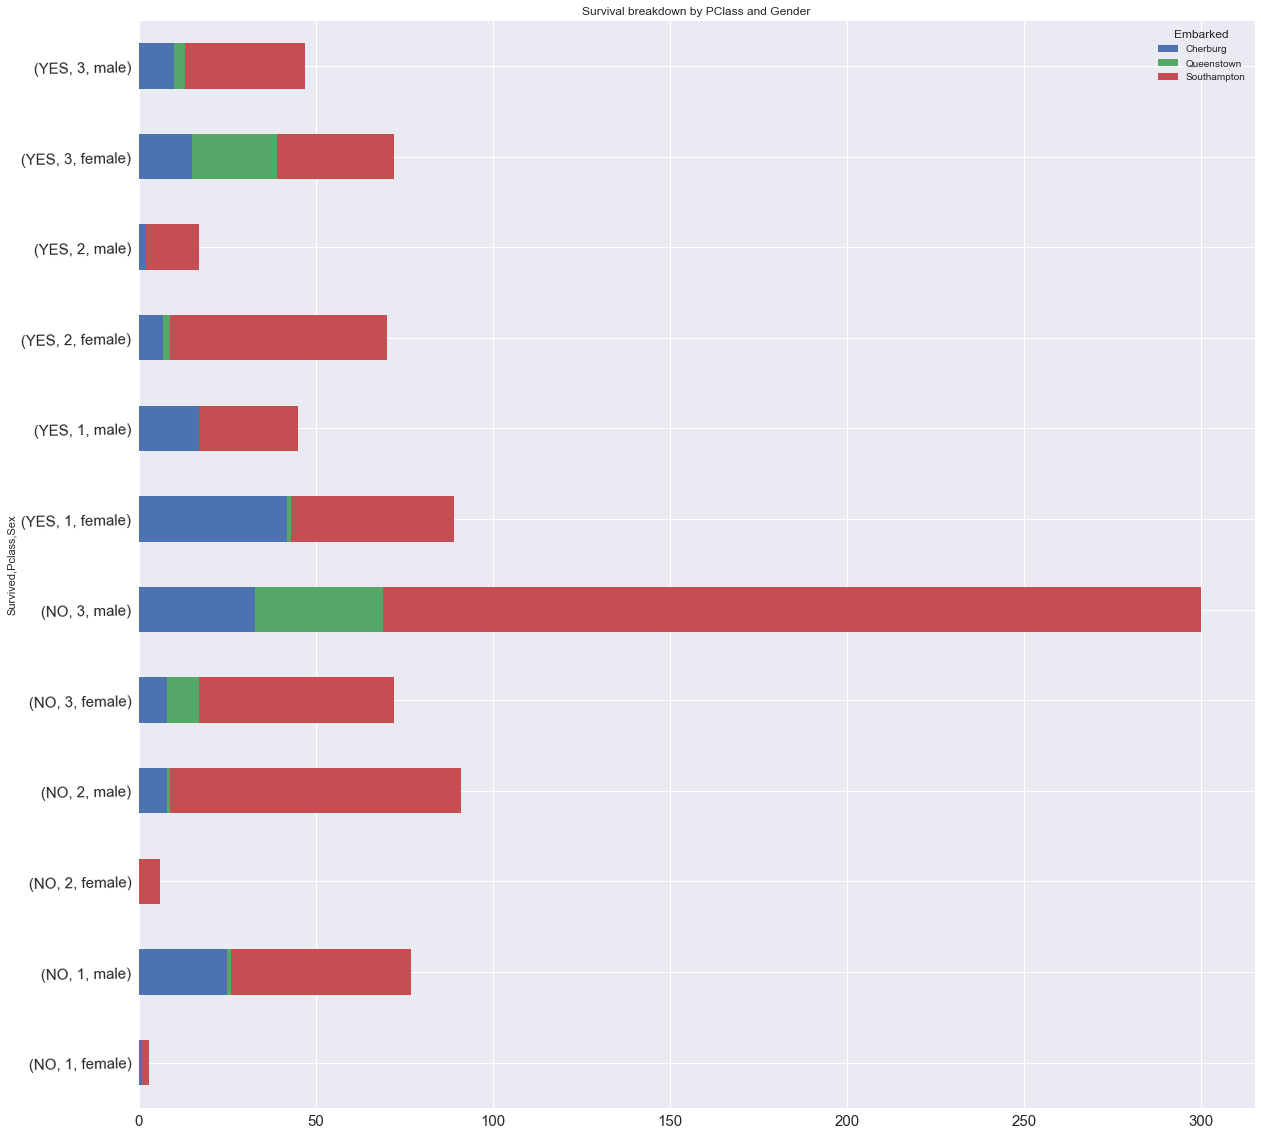

In [783]:
titanic_count_survived_pclass_sex_embarked.plot(kind='barh',stacked=True,title='Survival breakdown by PClass and Gender',rot = 1,figsize=(20,20),fontsize=15)
plt.show()


In [784]:
titanic_count_survived_embarked = titanic_df.groupby(['Survived','Embarked'])['PassengerId'].count().unstack()

In [785]:
titanic_count_survived_embarked

Embarked,Cherburg,Queenstown,Southampton
Survived,,,
NO,75,47,427
YES,93,30,217


In [786]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [787]:
titanic_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [788]:
titanic_df[pd.isnull(titanic_df['Embarked'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,YES,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,None
829,830,YES,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,None


In [789]:
titanic_df[pd.isnull(titanic_df['Age'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,NO,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Queenstown
17,18,YES,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,Southampton
19,20,YES,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,Cherburg
26,27,NO,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,Cherburg
28,29,YES,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Queenstown
29,30,NO,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,Southampton
31,32,YES,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,Cherburg
32,33,YES,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Queenstown
36,37,YES,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,Cherburg
42,43,NO,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,Cherburg


In [720]:
# data for survived 
titanic_survived_df  = titanic_df.loc[titanic_df['Survived'] == 'YES']
titanic_survived_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,YES,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,Cherburg
2,3,YES,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,YES,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,Southampton
8,9,YES,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,Southampton
9,10,YES,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,Cherburg
10,11,YES,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,Southampton
11,12,YES,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,C103,Southampton
15,16,YES,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,16.0000,NaN,Southampton
17,18,YES,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,Southampton
19,20,YES,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,Cherburg


In [721]:
titanic_survived_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             52
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          206
Embarked         2
dtype: int64

In [722]:
# data for not survived 
titanic_not_survived_df = titanic_df.loc[titanic_df['Survived'] == 'NO']
titanic_not_survived_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,NO,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
4,5,NO,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton
5,6,NO,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Queenstown
6,7,NO,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,Southampton
7,8,NO,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,Southampton
12,13,NO,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,Southampton
13,14,NO,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,Southampton
14,15,NO,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,Southampton
16,17,NO,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Queenstown
18,19,NO,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,Southampton


In [723]:
titanic_not_survived_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            125
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          481
Embarked         0
dtype: int64

In [724]:
titanic_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [790]:
titanic_df['Age'].mean()

29.69911764705882

In [792]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [794]:
# derive standard after removing the null values age rows from titanic_df

titanic_remove_null_age_df = titanic_df[np.isfinite(titanic_df['Age'])]

titanic_remove_null_age_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,NO,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,YES,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherburg
2,3,YES,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,YES,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,NO,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton
6,7,NO,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,Southampton
7,8,NO,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,Southampton
8,9,YES,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,Southampton
9,10,YES,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,Cherburg
10,11,YES,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,Southampton


In [796]:
def derive_standards(values):
    mean = values.mean()
    std = values.std(ddof=0)
    standards = (values - mean)/std
    return standards

In [800]:
titanic_remove_null_age_df['Age'].mean()

29.69911764705882

In [801]:
titanic_remove_null_age_df_standards = derive_standards(titanic_remove_null_age_df['Age'])

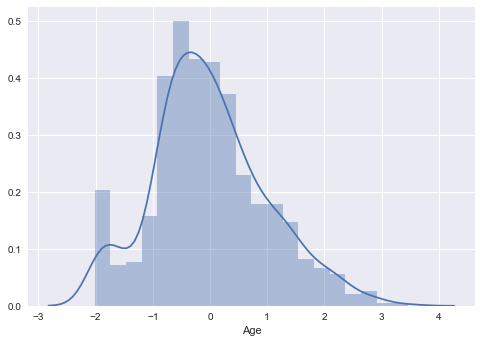

In [803]:
sns.distplot(titanic_remove_null_age_df_standards,hist=True, rug=False)
plt.show()


In [805]:
titanic_survived_remove_null_age_df = titanic_remove_null_age_df.loc[titanic_remove_null_age_df['Survived'] == 'YES']
titanic_survived_remove_null_age_df





,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,YES,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,Cherburg
2,3,YES,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,YES,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,Southampton
8,9,YES,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,Southampton
9,10,YES,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,Cherburg
10,11,YES,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,Southampton
11,12,YES,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,C103,Southampton
15,16,YES,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,16.0000,NaN,Southampton
21,22,YES,2,"Beesley, Mr. Lawrence",male,34.00,0,0,248698,13.0000,D56,Southampton
22,23,YES,3,"McGowan, Miss. Anna ""Annie""",female,15.00,0,0,330923,8.0292,NaN,Queenstown


In [807]:
titanic_survived_remove_null_age_df_standards = derive_standards(titanic_survived_remove_null_age_df['Age'])

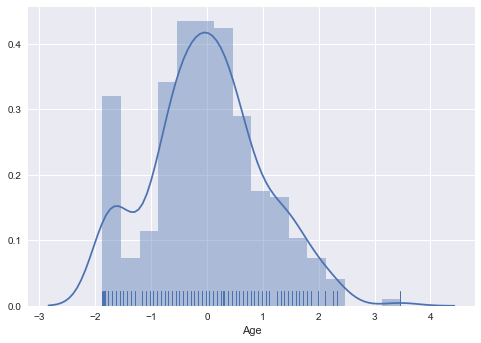

In [809]:
sns.distplot(titanic_survived_remove_null_age_df_standards,hist=True, rug=True)
plt.show()

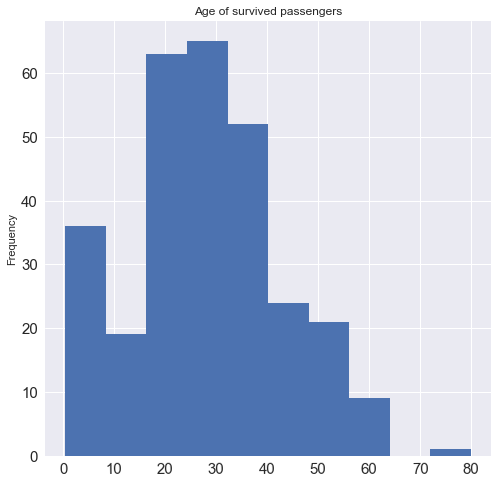

In [813]:
titanic_survived_remove_null_age_df['Age'].plot(kind='hist',title='Age of survived passengers',rot = 1,figsize=(8,8),fontsize=15)
plt.show()

In [816]:
titanic_not_survived_remove_null_age_df = titanic_remove_null_age_df.loc[titanic_remove_null_age_df['Survived'] == 'NO']
titanic_not_survived_remove_null_age_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,NO,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
4,5,NO,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton
6,7,NO,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,Southampton
7,8,NO,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,Southampton
12,13,NO,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,Southampton
13,14,NO,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,Southampton
14,15,NO,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,Southampton
16,17,NO,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Queenstown
18,19,NO,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,Southampton
20,21,NO,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,Southampton


In [817]:
titanic_not_survived_remove_null_age_df_standards = derive_standards(titanic_not_survived_remove_null_age_df['Age'])

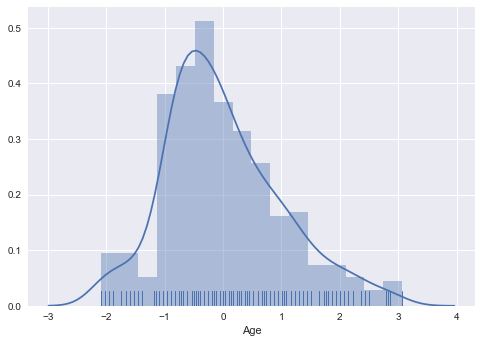

In [819]:
sns.distplot(titanic_not_survived_remove_null_age_df_standards,hist=True, rug=True)
plt.show()

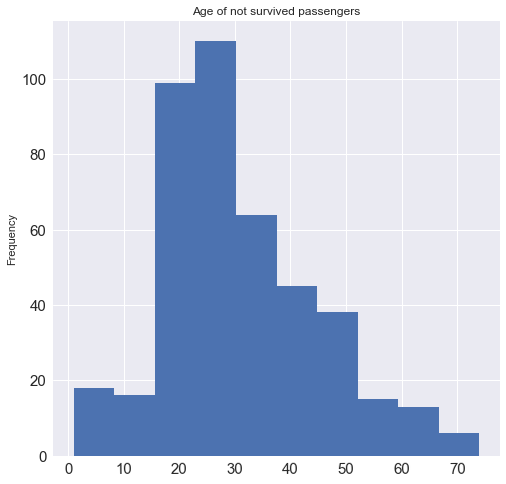

In [820]:
titanic_not_survived_remove_null_age_df['Age'].plot(kind='hist',title='Age of not survived passengers',rot = 1,figsize=(8,8),fontsize=15)
plt.show()

In [797]:
titanic_df_notnull = titanic_df

In [798]:
titanic_df_notnull['Age'] = titanic_df_notnull['Age'].fillna(titanic_df_notnull['Age'].mean())

In [799]:
titanic_df_notnull.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [729]:
titanic_df_notnull['Age'].mean()

29.69911764705882

In [730]:
titanic_df_notnull['Age'].std(ddof=0)

12.994716872789031

In [732]:
titanic_df_notnull_age_standards = derive_standards(titanic_df_notnull['Age'])
titanic_df_notnull_age_standards

0     -0.592481
1      0.638789
2     -0.284663
3      0.407926
4      0.407926
5      0.000000
6      1.870059
7     -2.131568
8     -0.207709
9     -1.208115
10    -1.977659
11     2.177876
12    -0.746389
13     0.715743
14    -1.208115
15     1.947013
16    -2.131568
17     0.000000
18     0.100109
19     0.000000
20     0.407926
21     0.330972
22    -1.131161
23    -0.130754
24    -1.669842
25     0.638789
26     0.000000
27    -0.823344
28     0.000000
29     0.000000
         ...   
861   -0.669435
862    1.408333
863    0.000000
864   -0.438572
865    0.946606
866   -0.207709
867    0.100109
868    0.000000
869   -1.977659
870   -0.284663
871    1.331378
872    0.254017
873    1.331378
874   -0.130754
875   -1.131161
876   -0.746389
877   -0.823344
878    0.000000
879    2.023967
880   -0.361618
881    0.254017
882   -0.592481
883   -0.130754
884   -0.361618
885    0.715743
886   -0.207709
887   -0.823344
888    0.000000
889   -0.284663
890    0.177063
Name: Age, dtype: float6

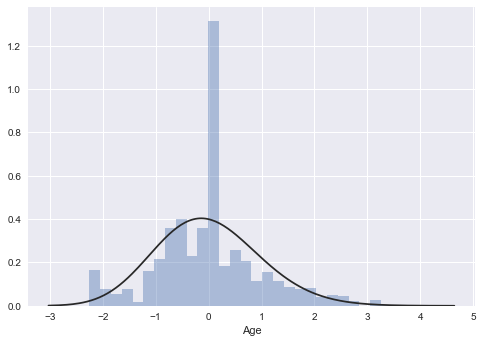

In [823]:
#sns.distplot(titanic_df_notnull_age_standards,hist=True, rug=True)
sns.distplot(titanic_df_notnull_age_standards, kde=False, fit=stats.gamma);
plt.show()

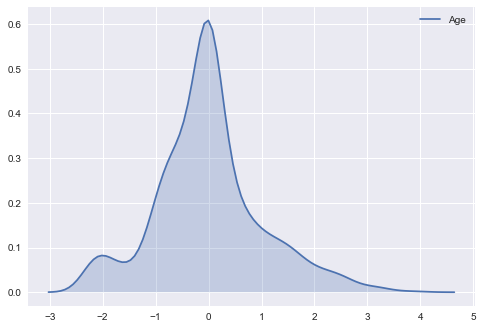

In [736]:
sns.kdeplot(titanic_df_notnull_age_standards, shade=True);
plt.show()

In [737]:
titanic_not_survived_notnull_df = titanic_df_notnull.loc[titanic_df_notnull['Survived'] == 'NO']
titanic_not_survived_notnull_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,NO,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,Southampton
4,5,NO,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,Southampton
5,6,NO,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Queenstown
6,7,NO,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,Southampton
7,8,NO,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,Southampton
12,13,NO,3,"Saundercock, Mr. William Henry",male,20.000000,0,0,A/5. 2151,8.0500,NaN,Southampton
13,14,NO,3,"Andersson, Mr. Anders Johan",male,39.000000,1,5,347082,31.2750,NaN,Southampton
14,15,NO,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.000000,0,0,350406,7.8542,NaN,Southampton
16,17,NO,3,"Rice, Master. Eugene",male,2.000000,4,1,382652,29.1250,NaN,Queenstown
18,19,NO,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.000000,1,0,345763,18.0000,NaN,Southampton


In [738]:
titanic_not_survived_notnull_df['Age'].mean()

30.415099646415943

In [739]:
titanic_not_survived_notnull_df['Age'].std(ddof=0)

12.44601964429823

In [740]:
titanic_not_survived_notnull_df_age_standards = derive_standards(titanic_not_survived_notnull_df['Age'])

In [741]:
titanic_not_survived_notnull_df_age_standards

0     -0.676128
4      0.368383
5     -0.057527
6      1.894975
7     -2.283067
12    -0.836822
13     0.689771
14    -1.318904
16    -2.283067
18     0.046995
20     0.368383
24    -1.800985
26    -0.057527
27    -0.917169
29    -0.057527
30     0.770118
33     2.859139
34    -0.194046
35     0.930812
37    -0.756475
38    -0.997516
40     0.770118
41    -0.274393
42    -0.057527
45    -0.057527
46    -0.057527
48    -0.057527
49    -0.997516
50    -1.881332
51    -0.756475
         ...   
844   -1.077863
845    0.930812
846   -0.057527
847    0.368383
848   -0.194046
850   -2.122373
851    3.501915
852   -1.720638
854    1.091506
859   -0.057527
860    0.850465
861   -0.756475
863   -0.057527
864   -0.515434
867    0.046995
868   -0.057527
870   -0.354740
872    0.207689
873    1.332547
876   -0.836822
877   -0.917169
878   -0.057527
881    0.207689
882   -0.676128
883   -0.194046
884   -0.435087
885    0.689771
886   -0.274393
888   -0.057527
890    0.127342
Name: Age, dtype: float6

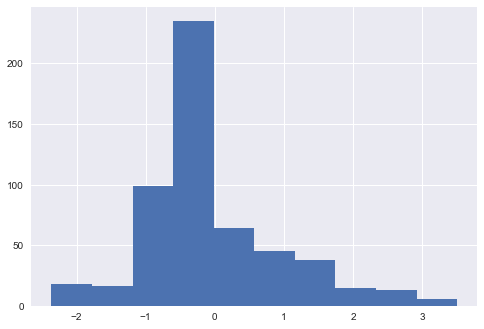

In [742]:
titanic_not_survived_notnull_df_age_standards.hist()
plt.show()

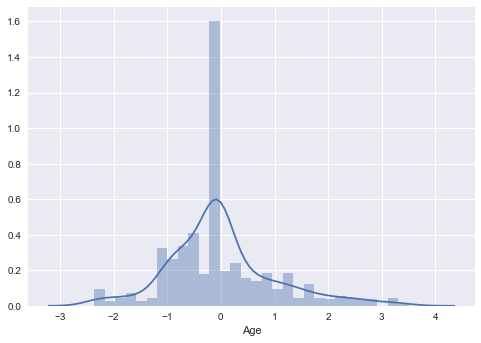

In [743]:
sns.distplot(titanic_not_survived_notnull_df_age_standards, bins=30,hist=True, rug=False);
plt.show()

In [744]:
titanic_survived_notnull_df = titanic_df_notnull.loc[titanic_df_notnull['Survived'] == 'YES']
titanic_survived_notnull_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,YES,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,Cherburg
2,3,YES,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,YES,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,Southampton
8,9,YES,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,Southampton
9,10,YES,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,Cherburg
10,11,YES,3,"Sandstrom, Miss. Marguerite Rut",female,4.000000,1,1,PP 9549,16.7000,G6,Southampton
11,12,YES,1,"Bonnell, Miss. Elizabeth",female,58.000000,0,0,113783,26.5500,C103,Southampton
15,16,YES,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.000000,0,0,248706,16.0000,NaN,Southampton
17,18,YES,2,"Williams, Mr. Charles Eugene",male,29.699118,0,0,244373,13.0000,NaN,Southampton
19,20,YES,3,"Masselmani, Mrs. Fatima",female,29.699118,0,0,2649,7.2250,NaN,Cherburg


In [745]:
titanic_survived_notnull_df['Age'].mean()

28.549778121775027

In [746]:
titanic_survived_notnull_df['Age'].std(ddof=0)

13.752347699015184

In [747]:
titanic_survived_notnull_df_age_standards = derive_standards(titanic_survived_notnull_df['Age'])

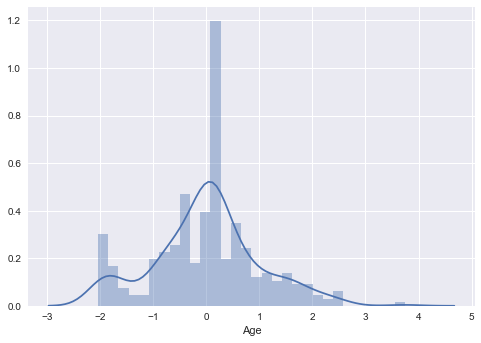

In [748]:
#sns.kdeplot(titanic_survived_df_age_standards, shade=True);
sns.distplot(titanic_survived_notnull_df_age_standards, bins=30,hist=True, rug=False);
plt.show()

In [751]:
# derive standard after removing the null values age rows from titanic_df

titanic_remove_age_null_df = titanic_df[np.isfinite(titanic_df['Age'])]

titanic_remove_age_null_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,NO,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,YES,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,Cherburg
2,3,YES,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,YES,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,Southampton
4,5,NO,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,Southampton
5,6,NO,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Queenstown
6,7,NO,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,Southampton
7,8,NO,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,Southampton
8,9,YES,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,Southampton
9,10,YES,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,Cherburg


In [824]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

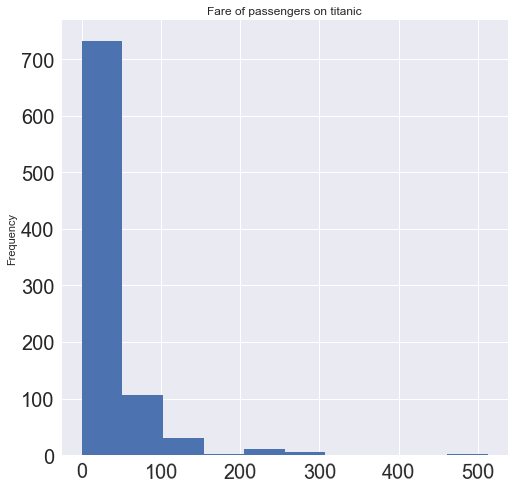

In [831]:
# plot a histogram of Fare data 
titanic_df['Fare'].plot(kind='hist',title='Fare of passengers on titanic',rot = 1,figsize=(8,8),fontsize=20)
plt.show()

In [833]:
# data for not survived passengers only 
not_survived_titanic_df = titanic_df.loc[titanic_df['Survived'] == 'NO']

In [834]:
# data for not survived passengers only 
survived_titanic_df = titanic_df.loc[titanic_df['Survived'] == 'YES']

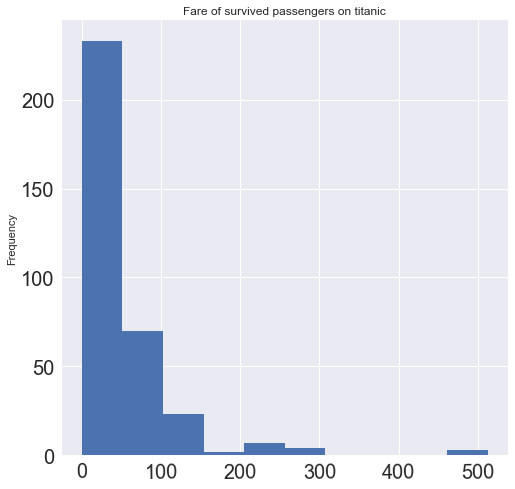

In [835]:
# plot a histogram of Fare data for survived passengers
survived_titanic_df['Fare'].plot(kind='hist',title='Fare of survived passengers on titanic',rot = 1,figsize=(8,8),fontsize=20)
plt.show()

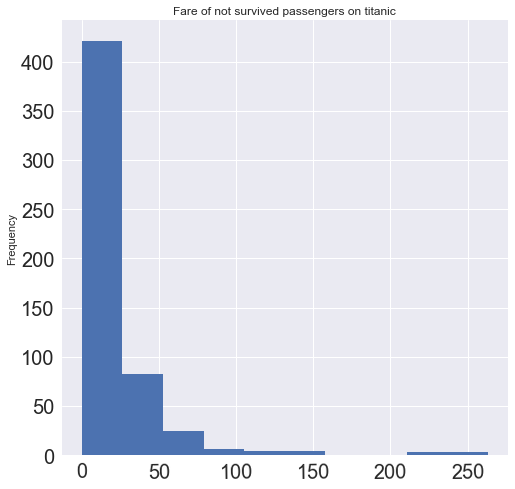

In [838]:
# plot a histogram of Fare data for not survived passengers
not_survived_titanic_df['Fare'].plot(kind='hist',title='Fare of not survived passengers on titanic',rot = 1,figsize=(8,8),fontsize=20)
plt.show()